In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('HR_comma_sep.csv')

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [7]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
df.rename(columns={'sales':'department'},inplace=True)

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df.left.unique()

array([1, 0], dtype=int64)

In [11]:
x=df.drop('left',axis=1)
y=df.left

In [14]:
x=pd.get_dummies(x)

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=101)

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
Bclf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=130,random_state=400,base_estimator=DecisionTreeClassifier()).fit(x_train,y_train)

In [35]:
Bclf.oob_score_

0.9913211829895187

In [36]:
Bclf.score

<bound method ClassifierMixin.score of BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                       

In [27]:
l={}
for i in range(10,300,20):
    Bclf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=i,random_state=400,base_estimator=DecisionTreeClassifier()).fit(x_train,y_train)
    l.update({i:Bclf.oob_score_})

C:\Users\shubham jain\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\shubham jain\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: divide by zero encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\shubham jain\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [33]:
l

{10: 0.9825756058481875,
 30: 0.9896521797182722,
 50: 0.9903197810267708,
 70: 0.9908538620735696,
 90: 0.9911209025969691,
 110: 0.991187662727819,
 130: 0.9913211829895187,
 150: 0.9912544228586688,
 170: 0.9911209025969691,
 190: 0.9912544228586688,
 210: 0.9912544228586688,
 230: 0.9912544228586688,
 250: 0.9911209025969691,
 270: 0.9909873823352694,
 290: 0.9909873823352694}

In [53]:
imp=[]
for i in Bclf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [56]:
feature_importance=pd.Series(imp,index=x.columns.tolist())

C:\Users\shubham jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


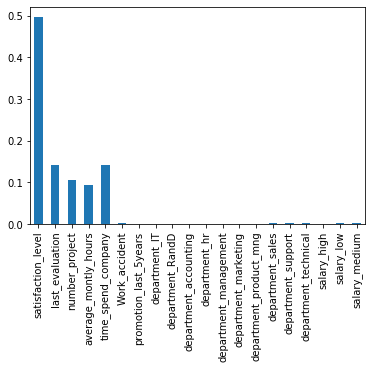

In [62]:
feature_importance.plot('bar')